In [10]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_pd = pd.read_csv(mouse_drug_data_to_load,delimiter=",")
clinical_trial_pd = pd.read_csv(clinical_trial_data_to_load,delimiter=",")
print(clinical_trial_pd.count())
#clinical_trial_pd.drop_duplicates(inplace=True)
clinical_trial_pd.count()


# print(mouse_drug_pd.count(),clinical_trial_pd.count())
merged_pd = pd.merge(clinical_trial_pd,mouse_drug_pd,on="Mouse ID")
# print(merged_pd.count())
merged_pd.head()
# merged_pd.to_csv('test.csv')
# Combine the data into a single dataset


# Display the data table for preview



Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [11]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merged_gr_drug_timepoint = merged_pd.groupby(["Drug","Timepoint"])
#merged_gr_drug_timepoint.mean()
# Convert to DataFrame
merged_drug_timepoint_mean_df = merged_gr_drug_timepoint["Tumor Volume (mm3)"].mean().reset_index()
# Preview DataFrame
merged_drug_timepoint_mean_df.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [12]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#merged_gr_drug_timepoint = merged_pd.groupby(["Drug","Timepoint"])
#merged_gr_drug_timepoint.mean()
# Convert to DataFrame
merged_drug_timepoint_sem_df = merged_gr_drug_timepoint[["Tumor Volume (mm3)"]].sem().reset_index()
# Preview DataFrame
#merged_drug_timepoint_sem_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume (mm3) std err"},inplace=True)
merged_drug_timepoint_sem_df.head(15)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [13]:
# mergemerge = pd.merge(merged_drug_timepoint_mean_df, merged_drug_timepoint_sem_df, on=["Drug","Timepoint"])
# mergemerge.head()

In [14]:
# Minor Data Munging to Re-Format the Data Frames
merged_drug_timepoint_mean_reformat_df = merged_drug_timepoint_mean_df.pivot("Timepoint","Drug","Tumor Volume (mm3)")
merged_drug_timepoint_sem_reformat_df = merged_drug_timepoint_sem_df.pivot("Timepoint","Drug","Tumor Volume (mm3)")
merged_drug_timepoint_mean_reformat_df.head(10)

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


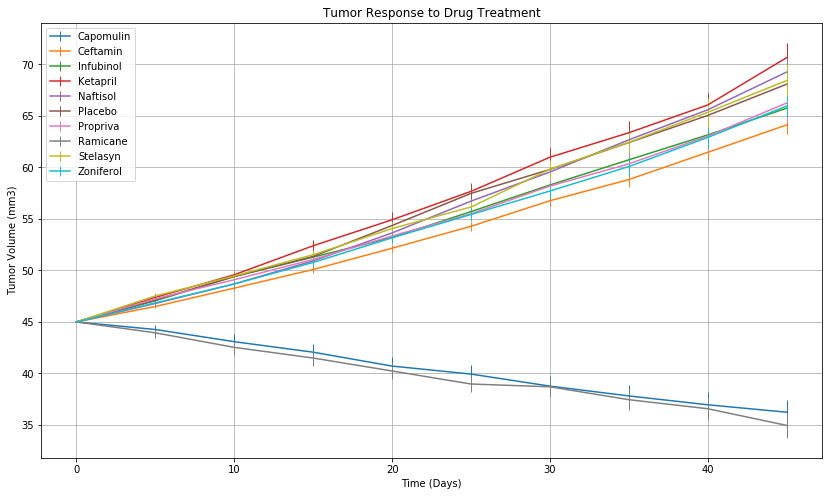

In [15]:
# Generate the Plot (with Error Bars)

druglist = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.figure(figsize=(14,8))

for _ in druglist:
    plt.errorbar(merged_drug_timepoint_mean_reformat_df.index,merged_drug_timepoint_mean_reformat_df[_],
             yerr=merged_drug_timepoint_sem_reformat_df[_],elinewidth=1)

plt.title("Tumor Response to Drug Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="Best")
#i think it looks better without the point markers, especially with 10 lines. it's hard enough to see as it is with all the
#    error bars and stuff overlapping :()
# Save the Figure
plt.savefig("Tumor_response.png")
plt.show()


In [16]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
merged_gr_meta_mean_df = merged_gr_drug_timepoint[["Metastatic Sites"]].mean().reset_index()
# Convert to DataFrame

# Preview DataFrame
merged_gr_meta_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
merged_gr_meta_sem_df = merged_gr_drug_timepoint[["Metastatic Sites"]].sem().reset_index()
# Convert to DataFrame

# Preview DataFrame
merged_gr_meta_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [19]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
merged_gr_meta_mean_reformat_df = merged_gr_meta_mean_df.pivot("Timepoint","Drug","Metastatic Sites")
merged_gr_meta_sem_reformat_df = merged_gr_meta_sem_df.pivot("Timepoint","Drug","Metastatic Sites")
merged_gr_meta_mean_reformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


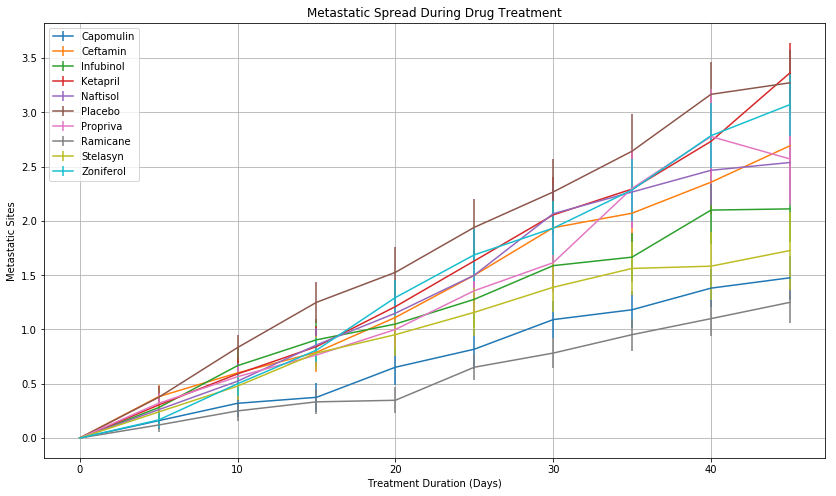

In [20]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


plt.figure(figsize=(14,8))

for _ in druglist:
    plt.errorbar(merged_gr_meta_mean_reformat_df.index,merged_gr_meta_mean_reformat_df[_],
             yerr=merged_gr_meta_sem_reformat_df[_])

plt.title("Metastatic Spread During Drug Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.legend(loc="Best")
#i think it looks better without the point markers, especially with 10 lines. it's hard enough to see as it is with all the
#    error bars and stuff overlapping :()
# Save the Figure
plt.savefig("metastatic_spread.png")
plt.show()


## Survival Rates

In [21]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mousecount_df = merged_gr_drug_timepoint["Mouse ID"].count().reset_index()
mousecount_df.rename(columns={"Mouse ID":"Mouse Count"},inplace=True)
# Convert to DataFrame
# Preview DataFrame
mousecount_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
# Minor Data Munging to Re-Format the Data Frames
#mousecount_df.dtypes
mousecount_reformat_df = mousecount_df.pivot("Timepoint","Drug","Mouse Count")

# Preview the Data Frame
mousecount_reformat_df.head()
#merged_gr_meta_mean_reformat_df = merged_gr_meta_mean_df.pivot("Timepoint","Drug","Metastatic Sites")

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


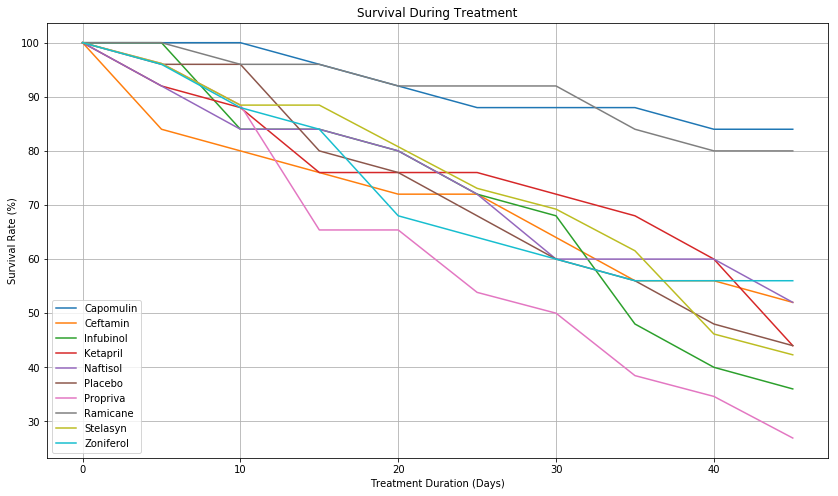

In [23]:
# Generate the Plot (Accounting for percentages)

plt.figure(figsize=(14,8))

for _ in druglist:
    plt.errorbar(mousecount_reformat_df.index,100*mousecount_reformat_df[_]/mousecount_reformat_df[_].max())

plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend(loc="Best")
#i think it looks better without the point markers, especially with 10 lines. it's hard enough to see as it is with all the
#    error bars and stuff overlapping :()
# Save the Figure
plt.savefig("survival_rates.png")

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug

# # Display the data to confirm

#add percentages to list, then add list to column
# percent_change_df = pd.DataFrame()
# percent_change_df["Drug"] = druglist
# percent_change = []
# for _ in druglist:
#     percent_change.append(100*(merged_drug_timepoint_mean_reformat_df[_][45]-merged_drug_timepoint_mean_reformat_df[_][0])/merged_drug_timepoint_mean_reformat_df[_][0])
# percent_change_df["Change"] = percent_change
# percent_change_df

#skip the list, add directly to column. Not sure which is cleaner or "better"

percent_change_df = pd.DataFrame()
percent_change_df["Drug"] = druglist
i = 0
for _ in druglist:
    percent_change_df.at[i,"Change"] = 100*(merged_drug_timepoint_mean_reformat_df[_][45]-merged_drug_timepoint_mean_reformat_df[_][0])/merged_drug_timepoint_mean_reformat_df[_][0]
    i += 1

percent_change_df

,Drug,Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


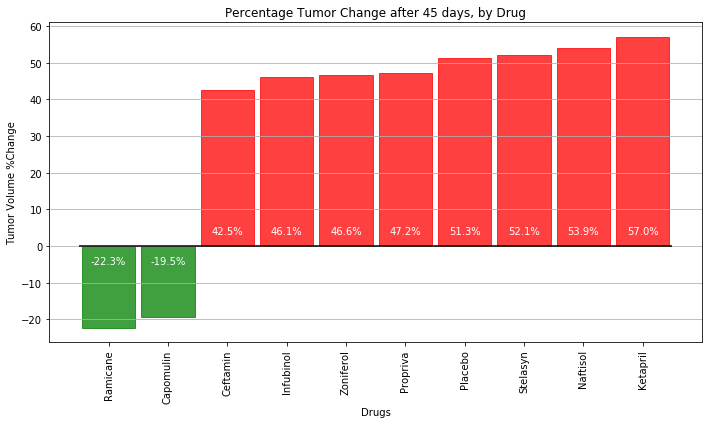

In [25]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple = tuple(percent_change_df["Change"])
druglist_tuple = tuple(druglist)

all_drugs_df = percent_change_df.sort_values(by="Change", ascending=True).reset_index(drop=True)
#print(all_drugs_df)
plt.figure(figsize=(10,6))
# Orient widths. Add labels, tick marks, etc. 
drug_bar_graph = plt.bar(all_drugs_df["Drug"],all_drugs_df["Change"], alpha=0.75, width=0.9)
plt.xticks(rotation=90)

for _ in range(10):
    if all_drugs_df["Change"][_] <= 0:
        drug_bar_graph[_].set_color('g')
    else:
        drug_bar_graph[_].set_color('r')

plt.hlines(0,-0.5,len(all_drugs_df["Change"])-.5)
plt.grid(axis="y")

#Use functions to label the percentages of changes
#function adapted from https://matplotlib.org/examples/api/barchart_demo.html
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            text_height = 1
        else:
            text_height = -1
        plt.text(rect.get_x() + rect.get_width()/2., text_height*4,
                '{0:.1f}%'.format(height),
                ha='center', va='center',color='w')

autolabel(drug_bar_graph)

plt.xlabel("Drugs")
plt.ylabel("Tumor Volume %Change")
plt.title("Percentage Tumor Change after 45 days, by Drug")
plt.tight_layout()
plt.savefig("percentage_change_by_drug.png")
plt.show()
# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()


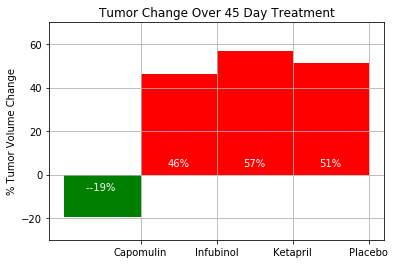